## 导入数据

IMDB 数据集也内置于 Keras 库。它已经过预处理：评论（单词序列）
已经被转换为整数序列，其中每个整数代表字典中的某个单词。

In [2]:
import ssl
from keras.datasets import imdb
# 全局设置，对requests不生效
ssl._create_default_https_context = ssl._create_unverified_context
# 加载 IMDB 数据集
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

参数 num_words=10000 的意思是仅保留训练数据中前 10000 个最常出现的单词。

train_data 和 test_data 这两个变量都是评论组成的列表，每条评论又是单词索引组成
的列表（表示一系列单词）。train_labels 和 test_labels 都是 0 和 1 组成的列表，其中 0
代表负面（negative），1 代表正面（positive）。

## One-hot 编程

对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列 [3, 5] 将会
被转换为 10000 维向量，只有索引为 3 和 5 的元素是 1，其余元素都是 0。然后网络第
一层可以用 Dense 层，它能够处理浮点数向量数据。

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data) 
# 样本现在变成了这样：
#>>> x_train[0]
#array([ 0., 1., 1., ..., 0., 0., 0.])

# 还应该将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 模型定义

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 留出验证集

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

x_train.shape
x_val.shape

(10000, 10000)

## 模型训练

现在使用 512 个样本组成的小批量，将模型训练 20 个轮次（即对 x_train 和 y_train 两
个张量中的所有样本进行 20 次迭代）。

In [44]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 93ms/step - loss: 0.5244 - acc: 0.7829 - val_loss: 0.3887 - val_acc: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3116 - acc: 0.8996 - val_loss: 0.3245 - val_acc: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2282 - acc: 0.9244 - val_loss: 0.2791 - val_acc: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1768 - acc: 0.9430 - val_loss: 0.2794 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1441 - acc: 0.9521 - val_loss: 0.2918 - val_acc: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1159 - acc: 0.9657 - val_loss: 0.3015 - val_acc: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0992 - acc: 0.9699 - val_loss: 0.3172 - val_acc: 0.8807
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0792 - a

## 绘制训练损失和验证损失

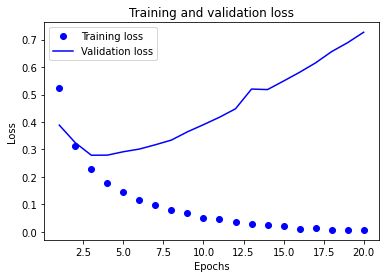

In [45]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 绘制训练精度和验证精度

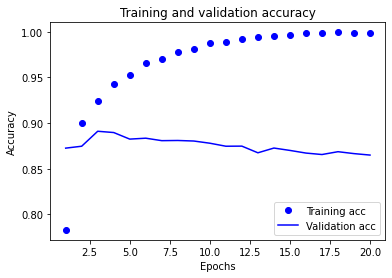

In [46]:
plt.clf() 
acc = history_dict['acc'] 
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 重新开始

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

model.summary()

In [50]:
model.summary()

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                160016    
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_5 (Bidirec

这种相当简单的方法得到了 88% 的精度。

## 进一步的改进：训练并评估一个双向 LSTM

In [18]:
#from keras.datasets import imdb
#from keras.preprocessing import sequence
#from keras import layers
#from keras.models import Sequential
import keras

# 作为特征的单词个数
max_features = 10000 

# 在这么多单词之后截断文本（这些单词都属于前 max_features 个最常见的单词）
maxlen = 500 

# 加载数据
(x_train, y_train), (x_test, y_test) = imdb.load_data(
 num_words=max_features) 

# 将序列反转
x_train = [x[::-1] for x in x_train] 
x_test = [x[::-1] for x in x_test]

# 填充序列
x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen) 
x_test = keras.utils.pad_sequences(x_test, maxlen=maxlen)

model2 = models.Sequential() 
model2.add(layers.Embedding(max_features, 32)) 
model2.add(layers.Bidirectional(layers.LSTM(32))) 
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
#history2 = model2.fit(x_train, y_train,
    #epochs=10, 
    #batch_size=128, 
    #validation_split=0.2)

#x_train.shape
#x_val.shape
#y_val.shape

(10000,)

## 绘制对比图

In [ ]:
import matplotlib.pyplot as plt

history_dict,history2_dict = history.history,history2.history
loss_values,loss_values2 = history_dict['loss'],history2_dict['loss']
val_loss_values,val_loss_values2 = history_dict['val_loss'],history2_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
epochs2 = range(1, len(loss_values2) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss of stacked RNN') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss of stacked-RNN') 
plt.plot(epochs2, loss_values2, 'ro', label='Training loss of bi-RNN') 
plt.plot(epochs2, val_loss_values2, 'r', label='Validation loss of bi-RNN') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf() 
acc,acc2 = history_dict['acc'],history2_dict['acc'] 
val_acc,val_acc2 = history_dict['val_acc'],history2_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc of stacked RNN')
plt.plot(epochs, val_acc, 'b', label='Validation acc of stacked RNN')
plt.plot(epochs2, acc2, 'ro', label='Training acc of bi-RNN')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc of bi-RNN')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

_______________________
_______________________
_______________________
_______________________

In [156]:
import tensorflow.compat.v1 as tf
# 全局设置，对requests不生效
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.utils import to_categorical

(x_train, y_train), _ = tf.keras.datasets.mnist.load_data( )

x_train = x_train.reshape(60000 , 784).astype('float32')/255
y_train = to_categorical(y_train, num_classes=4 )

model = tf.keras.Sequential( )
model.add(tf.keras.layers.Dense(4, activation='sigmoid',input_shape=(784, )))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="sgd" ,metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=0)

IndexError: index 5 is out of bounds for axis 1 with size 4

In [158]:
import tensorflow.compat.v1 as tf

_, (x_test_, y_test_ )= tf.keras.datasets.mnist.load_data()
x_test = x_test_.reshape(10000, 784).astype('float32')/255
y_test = to_categorical(y_test_ ,num_classes=10)

test_loss, test_acc = model.evaluate(x_test, y_test )

#test_loss 
test_acc 

IndexError: index 7 is out of bounds for axis 1 with size 4

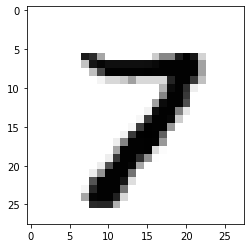

In [152]:
image = 34
_ =plt.imshow(x_test_[image], cmap=plt.cm.binary)

In [153]:
import tensorflow.compat.v1 as tf

import numpy as np
prediction = model.predict(x_test)
print("Model prediction: ", np.argmax(prediction[image]) )

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Model prediction:  7
